<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/Reinforcement_Learning_Upper_Confidence_Bound_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Needs practise

###Multi Armed Bandit Problem

for e.g. 

It can implement inside a dog. 
It can train the dog to walk. 
It will give all the options.
It is given a reward wheneve it does a correct step and a punishment when it falls over.
Good actions are rewarded. No need to train actual steps rather it will figure out what to do by itself.
(Much more complex topic).


There used to be a one handed bandit(like a slot machine in a casino). Multi-armed Bandit because when  person comes across a whole set of these slot machines which basically robs them their money. This is a historic problem. lets assume we have 5 machines, we have to figure out which one to play to maximize profit.

Assumption: each machine has a distribution of number that we can figure out. but it is unknown.

It is like a mind game. lIke The Imitation Game. the longer it takes to figure out, the more we will lose the money.

Regret is suffered when we choose the non optimal solution.
Regret  =  (Best Outcome - Non-Optimal Outcome)

Longer you spend on wromg machine, higher the regret.

But if we spen too little time, we get a suboptimal solution.

Goal: is to find the correct machine
assumimng the distributions are finite and we can find an optimal one.




###Upper Confidence Bound
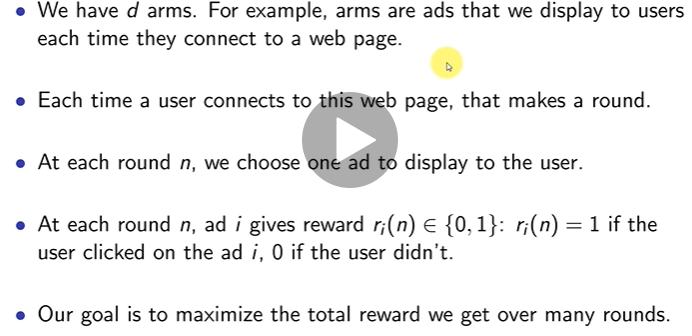

###How does it work
Lets say we do know the result.

It assume there is a starting value on the machines and have the same result.

They have a confidence band. First Couple of rounds are trial rounds.

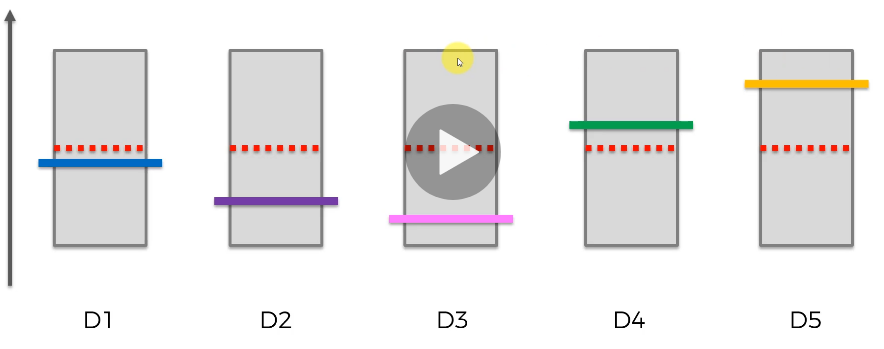

The average goes down and confidence interval becomes smaller.

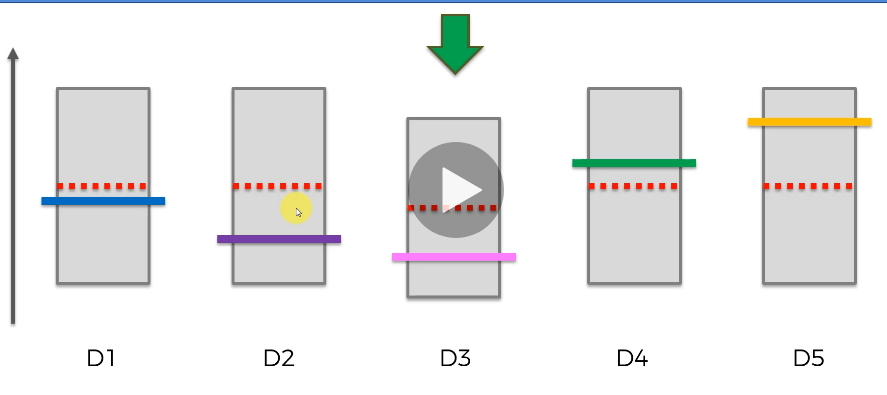


The other value increses. If the search stopped here. Then, we will achieve a sub optimal solution. Another value is added to the collection so the confdence value decreases.

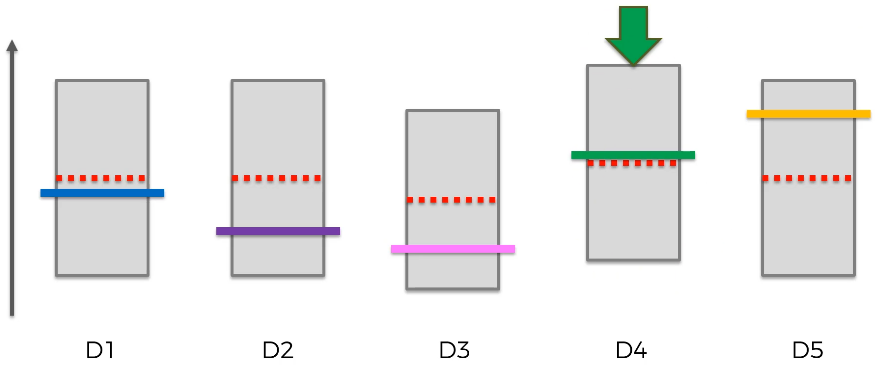

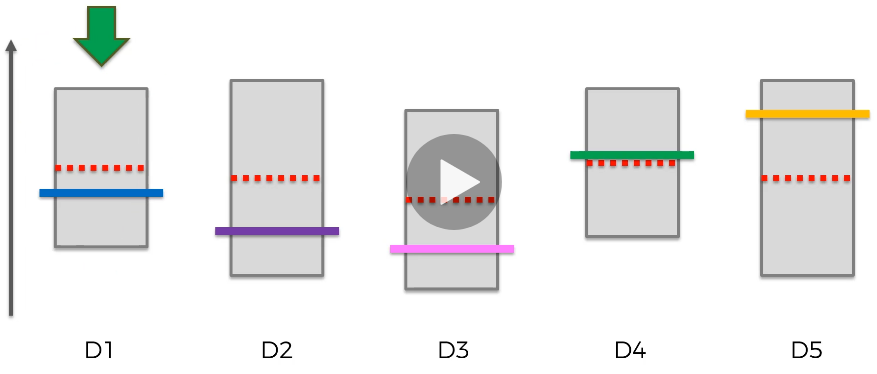

UCB Algorithm

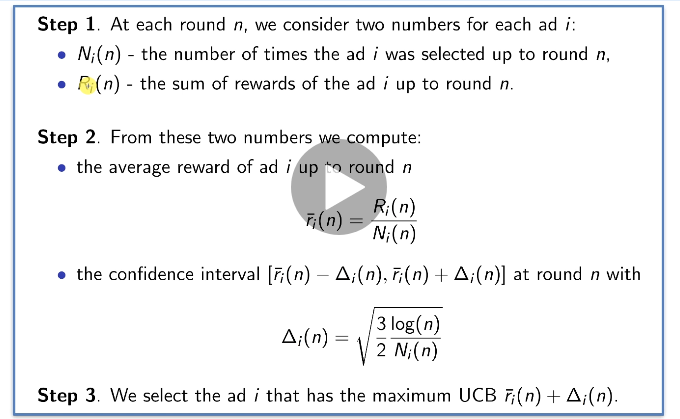

##Data Preprocessing

###Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Importing Dataset

In [ ]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')


##Implementing UCB

In [ ]:
import math
N = 10000#number of entries
d = 10#number of ads
#then, we need full list of ads that need to be selected
ads_selected = []
#next two variables are the varaibles in step 1 of algorithm
numbers_of_selection = [0] * d #number of times ad i was selected up to round n
sums_of_rewards = [0] * d #the sum of rewards of ad i up to round n
#in first round, no reward is given
total_reward = 0

#iterating in for loop
for n in range(0, N):
  ad = 0
  #we need to compute the maximum upper bound
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selection[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selection[i])
      upper_bound = average_reward + delta_i
    else:#we assume a random huge value for an upper bound
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):#we check this value in every step
      max_upper_bound = upper_bound#if this if condition is true
      #in any of the step
      # then that will automatically be the upper bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selection[ad] += 1
  reward = df.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + df.values[n, ad]
  total_reward = total_reward + reward 






##Visualizing the results

No handles with labels found to put in legend.


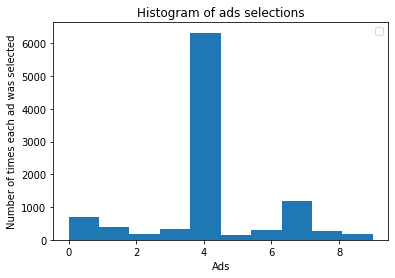

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.legend()